In [10]:
!apt-get update
!apt-get install -y swig
!apt-get install xvfb

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (184 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
swig is already the newest version (4.0.2-1ubuntu1).
0 upgraded, 0 newly installed, 0 to

In [2]:
pip install opencv-python

In [3]:
import cv2

def play_video(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow('Video', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()




In [4]:
!pip install rarfile --quiet
!pip install stable-baselines3 > /dev/null
!pip install box2d-py > /dev/null
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [5]:
# install dependencies
!pip3 install gym --upgrade
!pip3 install pyglet
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[Box_2D]
!pip3 install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827619 sha256=c1be7ae679a6d9d342a67ba099c2c14472846b8742364ca0cbf72ae92ec1c5d8
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
# !pip install gym==0.25.2
# !pip install box2d-py
!pip install pygame==2.1.0
import gym
env = gym.make('LunarLander-v2')
env.reset()
print("Environment setup successfully!")


Environment setup successfully!


In [5]:

from gym.wrappers import RecordVideo

In [6]:
import numpy as np
import random
import seaborn as sns
import numpy as np
import tensorflow as tf
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

#Q1

## Q1_Qlearning

In [ ]:
class WumpusWorld:
  def __init__(self, alpha=0.1, gamma=0.9, epsilon=1, epsilon_decrease=0.05):
    self.grid = [['o','o','g','p'],
                 ['w','o','p','o'],
                 ['o','o','o','o'],
                 ['o','o','p','o']]
    self.position = (3, 0)
    self.has_gold = False
    self.done = False
    self.q_table = {}
    self.alpha = alpha
    self.gamma = gamma
    self.epsilon = epsilon
    self.epsilon_decrease = epsilon_decrease
    self.score_hist = []



  def reset(self):
    valid_positions = [(i, j) for i in range(len(self.grid)) for j in range(len(self.grid[0])) if self.grid[i][j] == 'o']
    self.position = random.choice(valid_positions)
    self.has_gold = False
    self.done = False
    return self.position, self.has_gold, self.done

  def move(self, action):
    x, y = self.position
    if action == 0 :   ## move up
      x = max(x-1, 0)
    elif action == 1 : ## move down
      x = min(x+1, 3)
    elif action == 2 : ## move left
      y = max(y-1, 0)
    elif action == 3 : ## move right
      y = min(y+1, 3)

    self.position = (x, y)

    if self.grid[x][y] == 'w' :
      self.done = True
      score = -1000
    elif self.grid[x][y] == 'p' :
      self.done = True
      score = -1000
    elif self.grid[x][y] == 'g' :
      self.done = True
      score = +100
      self.has_gold = True
    else:
      score = -1;

    return self.position, score, self.has_gold, self.done

  def get_q_value(self, state, action):
    return self.q_table.get((state, action), 0)

  def choose_action(self, state):
    if random.random() < self.epsilon:
        self.epsilon = max(0, self.epsilon - self.epsilon_decrease)
        return random.choice([0, 1, 2, 3])
    else:
        q_values = [self.get_q_value(state, a) for a in range(4)]
        return q_values.index(max(q_values))


  def update_q_value(self, state, action, reward, next_state):
    max_q_next = max([self.get_q_value(next_state, a) for a in range(4)])
    current_q = self.get_q_value(state, action)
    new_q = current_q + self.alpha * (reward + self.gamma * max_q_next - current_q)
    self.q_table[(state, action)] = new_q

  def train_agent(self, episodes=1000):

    for episode in range(episodes):
      position, has_gold, done = self.reset()
      total_score = 0

      while not done:

        action = self.choose_action(position)
        next_position, reward, has_gold, done = self.move(action)
        self.update_q_value(position, action, reward, next_position)
        total_score += reward
        position = next_position

      print(f"Episode {episode}: Total Score = {total_score}")
      self.score_hist.append(total_score)




###Train agent

In [ ]:
a = WumpusWorld(epsilon_decrease=0.002)
a.train_agent(1000)

Episode 0: Total Score = -1002
Episode 1: Total Score = -1004
Episode 2: Total Score = -1003
Episode 3: Total Score = -1004
Episode 4: Total Score = -1000
Episode 5: Total Score = -1000
Episode 6: Total Score = -1001
Episode 7: Total Score = -1015
Episode 8: Total Score = -1000
Episode 9: Total Score = -1002
Episode 10: Total Score = 90
Episode 11: Total Score = -1004
Episode 12: Total Score = 99
Episode 13: Total Score = -1002
Episode 14: Total Score = -1000
Episode 15: Total Score = -1002
Episode 16: Total Score = -1002
Episode 17: Total Score = -1004
Episode 18: Total Score = -1004
Episode 19: Total Score = -1000
Episode 20: Total Score = 91
Episode 21: Total Score = -1012
Episode 22: Total Score = -1000
Episode 23: Total Score = -1002
Episode 24: Total Score = -1000
Episode 25: Total Score = -1016
Episode 26: Total Score = -1000
Episode 27: Total Score = -1020
Episode 28: Total Score = -1001
Episode 29: Total Score = 99
Episode 30: Total Score = -1006
Episode 31: Total Score = 99
E

In [ ]:
print(np.mean(a.score_hist))

-9.755


Text(0, 0.5, 'Score')

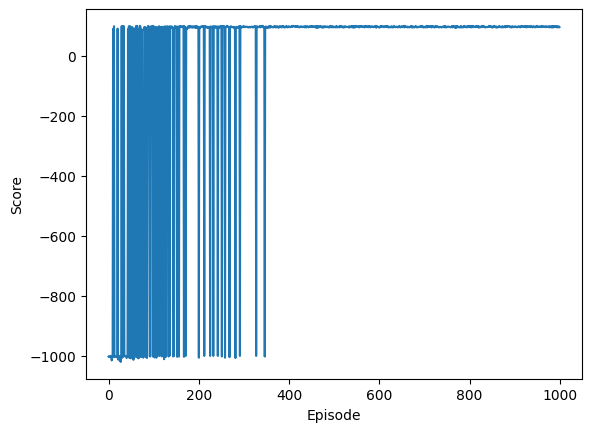

In [ ]:
plt.plot(a.score_hist)
plt.xlabel('Episode')
plt.ylabel('Score')

Text(0, 0.5, 'Cumulative Score')

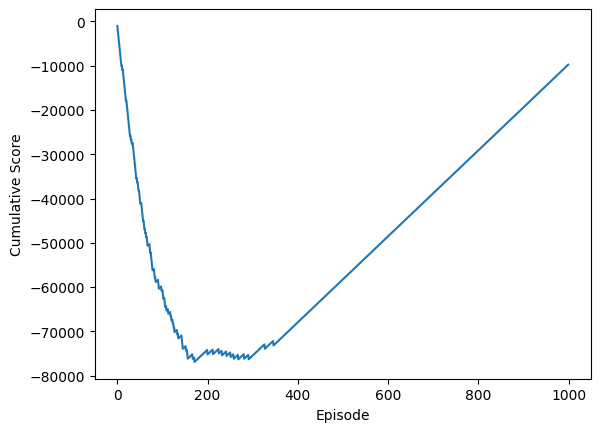

In [ ]:
plt.plot(np.cumsum(a.score_hist))
plt.xlabel('Episode')
plt.ylabel('Cumulative Score')

##Q1_DQN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.net(x)

class WumpusWorldDQN:
    def __init__(self, alpha=0.001, gamma=0.9, epsilon=1.0, epsilon_decrease=0.001):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.grid = [['o', 'o', 'g', 'p'],
                     ['w', 'o', 'p', 'o'],
                     ['o', 'o', 'o', 'o'],
                     ['o', 'o', 'p', 'o']]
        self.position = (3, 0)
        self.has_gold = False
        self.done = False
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decrease = epsilon_decrease
        self.replay_buffer = deque(maxlen=10000)
        self.model = DQN(2, 4).to(self.device)  # Move model to GPU
        self.target_model = DQN(2, 4).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.alpha)
        self.loss_fn = nn.SmoothL1Loss()
        self.score_hist = []


    def reset(self):
        valid_positions = [(i, j) for i in range(len(self.grid)) for j in range(len(self.grid[0])) if self.grid[i][j] == 'o']
        self.position = random.choice(valid_positions)
        self.has_gold = False
        self.done = False
        return self.state_vector(self.position), self.has_gold, self.done

    def state_vector(self, position):
        return torch.tensor([position[0] / 3.0, position[1] / 3.0], dtype=torch.float32, device=self.device)

    def move(self, action):
        x, y = self.position
        if action == 0:
            x = max(x-1, 0)
        elif action == 1:
            x = min(x+1, 3)
        elif action == 2:
            y = max(y-1, 0)
        elif action == 3:
            y = min(y+1, 3)

        self.position = (x, y)
        if self.grid[x][y] == 'w' or self.grid[x][y] == 'p':
            self.done = True
            score = -1000
        elif self.grid[x][y] == 'g':
            self.done = True
            score = 100
            self.has_gold = True
        else:
            score = -1
        return self.state_vector(self.position), score, self.has_gold, self.done

    def choose_action(self, state):
        if random.random() < self.epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            state = state.unsqueeze(0)  # Add batch dimension
            q_values = self.model(state)
            action = torch.argmax(q_values).item()
        return action

    def update_q_value(self, state, action, reward, next_state, done):
        state = state.unsqueeze(0)
        next_state = next_state.unsqueeze(0)
        current_q_values = self.model(state)
        next_q_values = self.target_model(next_state)
        max_next_q = torch.max(next_q_values)
        current_q = current_q_values[0, action]
        new_q = reward + self.gamma * max_next_q - current_q
        loss = self.loss_fn(current_q, new_q)


        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def train_agent(self, episodes=1000, batch_size=32):
        for episode in range(episodes):
            state, has_gold, done = self.reset()
            total_score = 0

            while not done:
                action = self.choose_action(state)
                next_state, reward, has_gold, done = self.move(action)
                self.replay_buffer.append((state, action, reward, next_state, done))
                total_score += reward
                if len(self.replay_buffer) > batch_size:
                    batch = random.sample(self.replay_buffer, batch_size)
                    for s, a, r, ns, d in batch:
                        self.update_q_value(s, a, r, ns, d)

                state = next_state

            if episode % 10 == 0:
                self.target_model.load_state_dict(self.model.state_dict())  # Update target network

            print(f"Episode {episode}: Total Score = {total_score}")
            self.score_hist.append(total_score)
            self.epsilon = max(0.01, self.epsilon - self.epsilon_decrease)

    def predict(self, start_position=(3, 0)):
        state, has_gold, done = self.reset()
        self.position = (1, 1)
        total_score = 0

        while not done:
            action = self.choose_action(state)
            next_state, reward, has_gold, done = self.move(action)
            total_score += reward
            state = next_state

        print(f"Total Score = {total_score}")




###Train agent

In [ ]:
b = WumpusWorldDQN(epsilon_decrease=1/900)
b.train_agent(episodes=1000)

Episode 0: Total Score = -1019
Episode 1: Total Score = -1002
Episode 2: Total Score = -1005
Episode 3: Total Score = -1003
Episode 4: Total Score = -1000
Episode 5: Total Score = -1003
Episode 6: Total Score = -1001
Episode 7: Total Score = -1008
Episode 8: Total Score = -1009
Episode 9: Total Score = -1004
Episode 10: Total Score = -1003
Episode 11: Total Score = -1002
Episode 12: Total Score = -1004
Episode 13: Total Score = -1005
Episode 14: Total Score = -1001
Episode 15: Total Score = -1002
Episode 16: Total Score = -1001
Episode 17: Total Score = -1003
Episode 18: Total Score = -1007
Episode 19: Total Score = -1000
Episode 20: Total Score = 100
Episode 21: Total Score = -1008
Episode 22: Total Score = -1003
Episode 23: Total Score = -1003
Episode 24: Total Score = -1019
Episode 25: Total Score = -1001
Episode 26: Total Score = -1008
Episode 27: Total Score = -1008
Episode 28: Total Score = -1001
Episode 29: Total Score = -1002
Episode 30: Total Score = -1009
Episode 31: Total Sc

In [ ]:
print(np.mean(b.score_hist))

-545.768


Text(0, 0.5, 'Score')

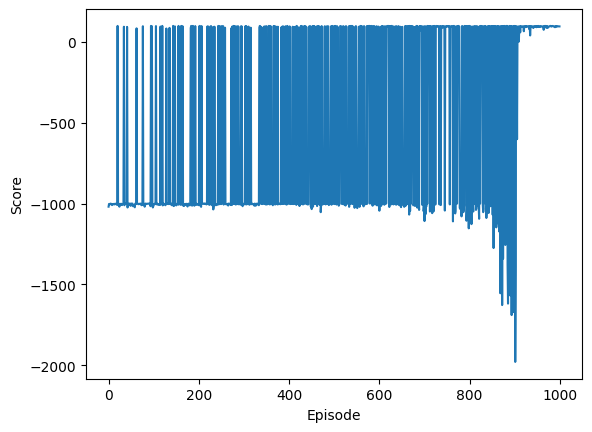

In [ ]:
plt.plot(b.score_hist)
plt.xlabel('Episode')
plt.ylabel('Score')

Text(0, 0.5, 'Cumulative Score')

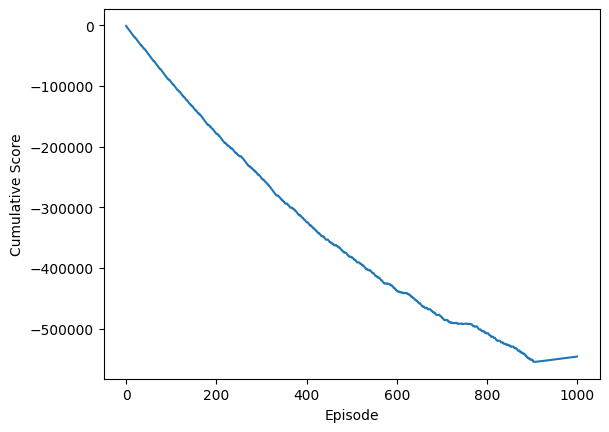

In [ ]:
plt.plot(np.cumsum(b.score_hist))
plt.xlabel('Episode')
plt.ylabel('Cumulative Score')

#Q2

##Q2_DQN_batch size=32

In [7]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        net_list = nn.ModuleList([
            torch.nn.Linear(state_size, 512),
            torch.nn.ReLU(),
            torch.nn.LayerNorm(512),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.LayerNorm(512),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, action_size)
        ])
        self.net = torch.nn.Sequential(*net_list).to(device)


    def forward(self, x):
        return self.net(x)

class lunarLanderDQN:
    def __init__(self, alpha=0.001, gamma=0.9, epsilon=1.0, epsilon_min=0.01, epsilon_decrease=0.001):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.has_gold = False
        self.done = False
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decrease = epsilon_decrease
        self.replay_buffer = deque(maxlen=10000)
        self.model = DQN(8, 4).to(self.device)  # Move model to GPU
        self.target_model = DQN(8, 4).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.alpha)
        self.loss_fn = nn.SmoothL1Loss()
        self.score_hist = []


    def choose_action(self, state):
        if random.random() < self.epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            state = state.unsqueeze(0)  # Add batch dimension
            q_values = self.model(state)
            action = torch.argmax(q_values).item()
        return action


    def update_q_value(self, state, action, reward, next_state, done):
        state = state
        next_state = next_state
        current_q_values = self.model(state)
        next_q_values = self.target_model(next_state)
        max_next_q = torch.max(next_q_values)
        current_q = current_q_values[action]
        new_q = reward + self.gamma * max_next_q - current_q
        # loss = self.loss_fn(current_q, new_q)
        # new_q = reward + self.gamma * max_next_q * (1 - int(done))
        loss = self.loss_fn(current_q.unsqueeze(0), new_q.unsqueeze(0))


        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def train_agent(self, episodes=1000, batch_size=32):
        for episode in range(episodes):
            counter = 0
            if episode % 50 == 0:
              env = RecordVideo(gym.make('LunarLander-v2'), f"./DQN/batch{batch_size}/eps{episode}")
            else:
              env = gym.make('LunarLander-v2')
            state = torch.tensor(env.reset()[0], dtype=torch.float32).to(self.device)
            done = False
            total_score = 0

            while (not done)  and (counter < 200):
                counter += 1
                action = self.choose_action(state)
                next_state, reward, done, truncated, info = env.step(action)
                next_state = torch.tensor(next_state, dtype=torch.float32).to(self.device)
                self.replay_buffer.append((state, action, reward, next_state, done))
                total_score += reward
                if len(self.replay_buffer) > batch_size:
                    batch = random.sample(self.replay_buffer, batch_size)
                    for s, a, r, ns, d in batch:
                        self.update_q_value(s, a, r, ns, d)

                state = next_state

            if episode % 10 == 0:
                self.target_model.load_state_dict(self.model.state_dict())  # Update target network
            self.score_hist.append(total_score)
            print(f"Episode {episode}: Total Score = {total_score}")
            self.epsilon = max(0.01, self.epsilon - self.epsilon_decrease)




###Train agent

In [8]:
# Create and train the agent
n_episodes = 200
eps = 1
eps_end = 0.01
BATCH_SIZE = 32
agent = lunarLanderDQN(epsilon=eps, epsilon_min=eps_end, epsilon_decrease=1/170)
agent.train_agent(episodes=n_episodes, batch_size=BATCH_SIZE)


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:59: UserWarning: WARN: Disabling video recorder because environment <TimeLimit<OrderEnforcing<PassiveEnvChecker<LunarLander<LunarLander-v2>>>>> was not initialized with any compatible video mode between `rgb_array` and `rgb_array_list`
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/envs/box2d/lunar_lander.py:604: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("LunarLander-v2", render_mode="rgb_array")
  gym.logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0: Total Score = -111.8452235639892
Episode 1: Total Score = -122.9034721720094
Episode 2: Total Score = -219.76396876395728
Episode 3: Total Score = -119.84196416666234
Episode 4: Total Score = -105.56749796266496
Episode 5: Total Score = -87.60711783819954
Episode 6: Total Score = -62.524605914318855
Episode 7: Total Score = -82.04416313150219
Episode 8: Total Score = -357.87741666805005
Episode 9: Total Score = -84.40306809775673
Episode 10: Total Score = -96.75171630978086
Episode 11: Total Score = -200.38090246801215
Episode 12: Total Score = -448.8705825084573
Episode 13: Total Score = -155.46680460163824
Episode 14: Total Score = -95.1857064773627
Episode 15: Total Score = -141.84659105437436
Episode 16: Total Score = -94.55929800817387
Episode 17: Total Score = -58.09233620828681
Episode 18: Total Score = -78.51777531642281
Episode 19: Total Score = -153.0554085742063
Episode 20: Total Score = -81.48839137215782
Episode 21: Total Score = -241.71247875107025
Episode 22: 

In [9]:
print(np.mean(agent.score_hist))

-78.03126823876852


Text(0, 0.5, 'Score')

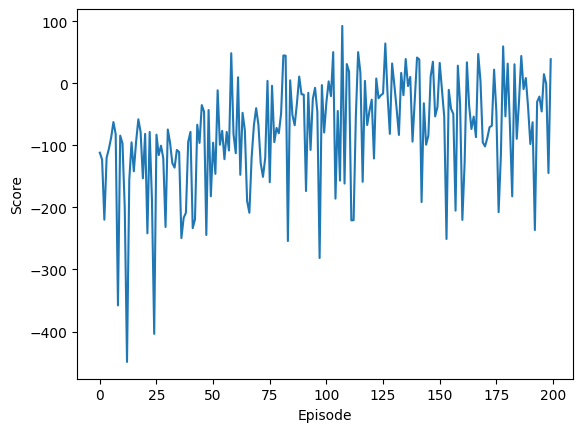

In [10]:
plt.plot(agent.score_hist)
plt.xlabel('Episode')
plt.ylabel('Score')

Text(0, 0.5, 'Cumulative Score')

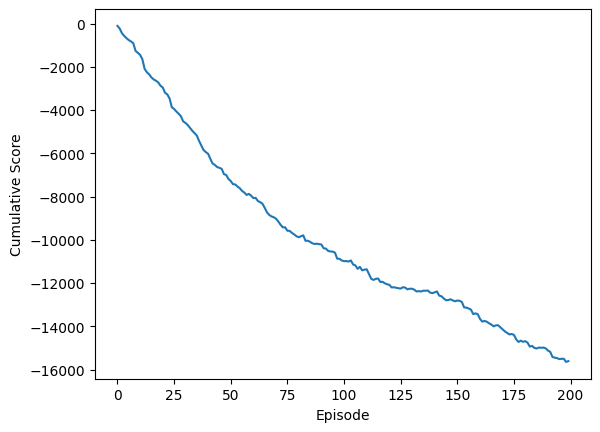

In [11]:
plt.plot(np.cumsum(agent.score_hist))
plt.xlabel('Episode')
plt.ylabel('Cumulative Score')

##Q2_DQN_batch size = 64

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import gym
from gym.wrappers import RecordVideo

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        net_list = nn.ModuleList([
            torch.nn.Linear(state_size, 512),
            torch.nn.ReLU(),
            torch.nn.LayerNorm(512),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.LayerNorm(512),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, action_size)
        ])
        self.net = torch.nn.Sequential(*net_list).to(device)

    def forward(self, x):
        return self.net(x)

class lunarLanderDQN:
    def __init__(self, alpha=0.001, gamma=0.9, epsilon=1.0, epsilon_min=0.01, epsilon_decrease=0.001):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.has_gold = False
        self.done = False
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decrease = epsilon_decrease
        self.replay_buffer = deque(maxlen=10000)
        self.model = DQN(8, 4).to(self.device)  # Move model to GPU
        self.target_model = DQN(8, 4).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.alpha)
        self.loss_fn = nn.SmoothL1Loss()
        self.score_hist = []

    def choose_action(self, state):
        if random.random() < self.epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            state = state.unsqueeze(0)  # Add batch dimension
            q_values = self.model(state)
            action = torch.argmax(q_values).item()
        return action

    def update_q_value(self, state, action, reward, next_state, done):
        state = state
        next_state = next_state
        current_q_values = self.model(state)
        next_q_values = self.target_model(next_state)
        max_next_q = torch.max(next_q_values)
        current_q = current_q_values[action]
        new_q = reward + self.gamma * max_next_q - current_q
        loss = self.loss_fn(current_q.unsqueeze(0), new_q.unsqueeze(0))

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def train_agent(self, episodes=1000, batch_size=32):
        for episode in range(episodes):
            counter = 0
            if episode % 10 == 0:
                env = RecordVideo(gym.make('LunarLander-v2', render_mode="rgb_array"), f"./DQN/batch{batch_size}/eps{episode}")
            else:
                env = gym.make('LunarLander-v2')
            state = torch.tensor(env.reset()[0], dtype=torch.float32).to(self.device)
            done = False
            total_score = 0

            while (not done) and (counter < 200):
                counter += 1
                action = self.choose_action(state)
                next_state, reward, done, truncated, info = env.step(action)
                next_state = torch.tensor(next_state, dtype=torch.float32).to(self.device)
                self.replay_buffer.append((state, action, reward, next_state, done))
                total_score += reward
                if len(self.replay_buffer) > batch_size:
                    batch = random.sample(self.replay_buffer, batch_size)
                    for s, a, r, ns, d in batch:
                        self.update_q_value(s, a, r, ns, d)

                state = next_state

            if episode % 10 == 0:
                self.target_model.load_state_dict(self.model.state_dict())  # Update target network
            self.score_hist.append(total_score)
            print(f"Episode {episode}: Total Score = {total_score}")
            self.epsilon = max(0.01, self.epsilon - self.epsilon_decrease)

In [ ]:
# Create and train the agent
n_episodes = 200
eps = 1
eps_end = 0.01
BATCH_SIZE = 64
agent2 = lunarLanderDQN(epsilon=eps, epsilon_min=eps_end, epsilon_decrease=1/170)
agent2.train_agent(episodes=n_episodes, batch_size=BATCH_SIZE)


Moviepy - Building video /content/DQN/batch64/eps0/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps0/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps0/rl-video-episode-0.mp4
Episode 0: Total Score = -129.79661715122597
Episode 1: Total Score = -161.88891380205115
Episode 2: Total Score = -137.8070420528399
Episode 3: Total Score = -280.94600299428305
Episode 4: Total Score = -72.10860029292088
Episode 5: Total Score = -265.24112994885
Episode 6: Total Score = -104.42702785881792
Episode 7: Total Score = -58.38299644368309
Episode 8: Total Score = -160.5019823242781
Episode 9: Total Score = -90.53878292842536
Moviepy - Building video /content/DQN/batch64/eps10/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps10/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps10/rl-video-episode-0.mp4
Episode 10: Total Score = -117.41991106359342
Episode 11: Total Score = -70.2296918586849
Episode 12: Total Score = -65.4633671522493
Episode 13: Total Score = -146.26198101840527
Episode 14: Total Score = -218.98538353763175
Episode 15: Total Score = -323.446982882053
Episode 16: Total Score = -117.3864531454837
Episode 17: Total Score = -106.84811195796699
Episode 18: Total Score = -94.01794774717148
Episode 19: Total Score = -101.60946234471128
Moviepy - Building video /content/DQN/batch64/eps20/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps20/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps20/rl-video-episode-0.mp4
Episode 20: Total Score = -276.60145169799705
Episode 21: Total Score = -179.20581032420316
Episode 22: Total Score = -82.46956822978719
Episode 23: Total Score = -152.0667836924494
Episode 24: Total Score = -275.32950339007493
Episode 25: Total Score = -45.76750900696089
Episode 26: Total Score = -88.68167331159336
Episode 27: Total Score = -89.77517849861562
Episode 28: Total Score = -53.95457973612081
Episode 29: Total Score = -174.27102711300856
Moviepy - Building video /content/DQN/batch64/eps30/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps30/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps30/rl-video-episode-0.mp4
Episode 30: Total Score = -206.20135118782804
Episode 31: Total Score = -99.52040227624845
Episode 32: Total Score = -98.71446665906964
Episode 33: Total Score = -90.39325382171701
Episode 34: Total Score = -118.8250663453928
Episode 35: Total Score = -175.53979579240365
Episode 36: Total Score = -101.68636433700605
Episode 37: Total Score = -82.952527717231
Episode 38: Total Score = -177.90069660300367
Episode 39: Total Score = -264.1234977022747
Moviepy - Building video /content/DQN/batch64/eps40/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps40/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps40/rl-video-episode-0.mp4
Episode 40: Total Score = -167.6819990114127
Episode 41: Total Score = -52.01288215812234
Episode 42: Total Score = -63.594108649549256
Episode 43: Total Score = -101.1739651705967
Episode 44: Total Score = -99.42210271785456
Episode 45: Total Score = -155.03139489939326
Episode 46: Total Score = -288.5776973067045
Episode 47: Total Score = -62.19064944063585
Episode 48: Total Score = -113.93466015469576
Episode 49: Total Score = -177.19096674167707
Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50: Total Score = -133.0677609904944
Episode 51: Total Score = -218.92067028009137
Episode 52: Total Score = -88.059492653665
Episode 53: Total Score = -44.46094537956765
Episode 54: Total Score = -115.92395713372758
Episode 55: Total Score = -235.70261913602207
Episode 56: Total Score = -54.992862698490114
Episode 57: Total Score = -127.25239006635616
Episode 58: Total Score = -78.87814750572369
Episode 59: Total Score = -190.64975660571193
Moviepy - Building video /content/DQN/batch64/eps60/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps60/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps60/rl-video-episode-0.mp4
Episode 60: Total Score = -183.33719807241465
Episode 61: Total Score = -75.80718208061899
Episode 62: Total Score = -202.86348500518255
Episode 63: Total Score = -78.60987177765253
Episode 64: Total Score = -97.52596186997272
Episode 65: Total Score = -96.71595154888317
Episode 66: Total Score = -26.5992580213522
Episode 67: Total Score = -58.68833188218313
Episode 68: Total Score = -95.06088256424071
Episode 69: Total Score = -165.82387120941638
Moviepy - Building video /content/DQN/batch64/eps70/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps70/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps70/rl-video-episode-0.mp4
Episode 70: Total Score = -118.64466298257958
Episode 71: Total Score = -3.1261554220561862
Episode 72: Total Score = -170.72341384739914
Episode 73: Total Score = -66.78329152470337
Episode 74: Total Score = -87.47700597337206
Episode 75: Total Score = -44.996648923843324
Episode 76: Total Score = -9.643138707533993
Episode 77: Total Score = -37.053883940574664
Episode 78: Total Score = 26.356016183716044
Episode 79: Total Score = -58.03170639408452
Moviepy - Building video /content/DQN/batch64/eps80/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps80/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps80/rl-video-episode-0.mp4
Episode 80: Total Score = -94.39576263236745
Episode 81: Total Score = -7.139336033275995
Episode 82: Total Score = -13.511801510534553
Episode 83: Total Score = -43.544183282845616
Episode 84: Total Score = -96.09718884129597
Episode 85: Total Score = -64.98925757872561
Episode 86: Total Score = -99.63295522669647
Episode 87: Total Score = -50.953137462273766
Episode 88: Total Score = -31.10173402822418
Episode 89: Total Score = -40.51886756780234
Moviepy - Building video /content/DQN/batch64/eps90/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps90/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps90/rl-video-episode-0.mp4
Episode 90: Total Score = -192.16315651528748
Episode 91: Total Score = -1.215383936839487
Episode 92: Total Score = -76.38253628139536
Episode 93: Total Score = 132.01104163486926
Episode 94: Total Score = -2.5250540765565006
Episode 95: Total Score = -13.547376597646386
Episode 96: Total Score = 103.60905400993444
Episode 97: Total Score = -197.4063957421147
Episode 98: Total Score = -37.59588258025241
Episode 99: Total Score = -224.83476623546233
Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100: Total Score = -145.70695144247605
Episode 101: Total Score = -42.71298309218882
Episode 102: Total Score = 12.890560301038791
Episode 103: Total Score = -59.58423093031526
Episode 104: Total Score = 4.124382974649406
Episode 105: Total Score = -19.232980867879547
Episode 106: Total Score = 29.412932390729967


##Q2_DDQN

In [ ]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        net_list = nn.ModuleList([
            torch.nn.Linear(state_size, 512),
            torch.nn.ReLU(),
            torch.nn.LayerNorm(512),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.LayerNorm(512),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, action_size)
        ])
        self.net = torch.nn.Sequential(*net_list).to(device)

    def forward(self, x):
        return self.net(x)

class lunarLanderDDQN:
    def __init__(self, alpha=0.001, gamma=0.9, epsilon=1.0, epsilon_min=0.01, epsilon_decrease=0.001):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decrease = epsilon_decrease
        self.replay_buffer = deque(maxlen=10000)
        self.model = DQN(8, 4).to(self.device)
        self.target_model = DQN(8, 4).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.alpha)
        self.loss_fn = nn.SmoothL1Loss()
        self.score_hist = []

    def choose_action(self, state):
        if random.random() < self.epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            state = state.unsqueeze(0)  # Add batch dimension
            q_values = self.model(state)
            action = torch.argmax(q_values).item()
        return action

    def update_q_value(self, state, action, reward, next_state, done):
        state = state.unsqueeze(0)  # Add batch dimension
        next_state = next_state.unsqueeze(0)  # Add batch dimension
        current_q_values = self.model(state)
        next_q_values = self.model(next_state)
        next_q_target_values = self.target_model(next_state)
        next_action = torch.argmax(next_q_values, dim=1)
        max_next_q = next_q_target_values.gather(1, next_action.unsqueeze(1)).squeeze(1)

        target_q_value = reward + (1 - done) * self.gamma * max_next_q
        loss = self.loss_fn(current_q_values[0, action], target_q_value.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def train_agent(self, episodes=1000, batch_size=32):
        for episode in range(episodes):
            if episode % 50 == 0:
                env = RecordVideo(gym.make('LunarLander-v2'), f"./DDQN/batch{batch_size}/eps{episode}")
            else:
                env = gym.make('LunarLander-v2')
            state = torch.tensor(env.reset()[0], dtype=torch.float32).to(self.device)
            done = False
            total_score = 0

            while not done:
                action = self.choose_action(state)
                next_state, reward, done, truncated, info = env.step(action)
                next_state = torch.tensor(next_state, dtype=torch.float32).to(self.device)
                self.replay_buffer.append((state, action, reward, next_state, done))
                total_score += reward
                if len(self.replay_buffer) > batch_size:
                    batch = random.sample(self.replay_buffer, batch_size)
                    for s, a, r, ns, d in batch:
                        self.update_q_value(s, a, r, ns, d)

                state = next_state

            if episode % 10 == 0:
                self.target_model.load_state_dict(self.model.state_dict())  # Update target network
            self.score_hist.append(total_score)
            print(f"Episode {episode}: Total Score = {total_score}")
            self.epsilon = max(self.epsilon_min, self.epsilon - self.epsilon_decrease)


In [ ]:
# Create and train the agent
n_episodes = 100
eps = 1
eps_end = 0.01
BATCH_SIZE = 32
agent = lunarLanderDDQN(epsilon=eps, epsilon_min=eps_end, epsilon_decrease=1/90)
agent.train_agent(episodes=n_episodes, batch_size=BATCH_SIZE)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:939: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Episode 0: Total Score = -182.19201290394247
Episode 1: Total Score = -314.1560531247068
Episode 2: Total Score = -129.87216942869162
Episode 3: Total Score = -108.65178247579246
Episode 4: Total Score = -137.30589282554044
Episode 5: Total Score = -421.8903968453135
Episode 6: Total Score = 68.65522379743769
Episode 7: Total Score = -218.31644697876732
Episode 8: Total Score = -279.47080333056147
Episode 9: Total Score = -115.2859762202898
Episode 10: Total Score = -83.12375665879483
Episode 11: Total Score = -153.09091110264978
Episode 12: Total Score = -135.48711601652207
Episode 13: Total Score = -78.22409205563324
Episode 14: Total Score = -90.64649130466346
Episode 15: Total Score = -114.2893995425747
Episode 16: Total Score = -188.7516331417675
Episode 17: Total Score = -75.6071080067094
Episode 18: Total Score = -71.22837635757696
Episode 19: Total Score = -43.57717148872973
Episode 20: Total Score = -103.59943896085163
Episode 21: Total Score = -25.161207560584046
Episode 22: 